In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [103]:
df.shape

(1025, 14)

In [104]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [106]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [107]:
df.isna().mean() * 100

,0
age,0.0
sex,0.0
cp,0.0
trestbps,0.0
chol,0.0
fbs,0.0
restecg,0.0
thalach,0.0
exang,0.0
oldpeak,0.0


In [108]:
df['sex'].value_counts()

,count
sex,
1,713
0,312


In [109]:
X = df.drop(columns=['target'])
y = df[['target']]

In [110]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [111]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [113]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
909,50,1,0,144,200,0,0,126,1,0.9,1,0,3
695,35,1,0,126,282,0,0,156,1,0.0,2,0,3
918,59,1,3,134,204,0,1,162,0,0.8,2,2,2
766,57,1,0,110,335,0,1,143,1,3.0,1,1,3
249,42,1,2,130,180,0,1,150,0,0.0,2,0,2


In [114]:
y_train.head()

,target
909,0
695,0
918,0
766,0
249,1


In [115]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820, 1), (205, 1))

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
X_train

array([[0.4375    , 1.        , 0.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.125     , 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.625     , 1.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       ...,
       [0.97916667, 0.        , 0.66666667, ..., 0.5       , 0.        ,
        0.66666667],
       [0.5625    , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.45833333, 1.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667]])

In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((820, 13), (205, 13), (820, 1), (205, 1))

In [119]:
label = y_test['target'].unique()
label

array([1, 0])

In [120]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [121]:
from sklearn.metrics import accuracy_score

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9451219512195121
Test Accuracy: 0.8341463414634146


In [122]:
accuracy_score_list = []

for i in range(1,20,2):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    accuracy_score_list.append([i,train_accuracy,test_accuracy])

df = pd.DataFrame(accuracy_score_list,columns=['n_neighbors','train_accuracy','test_accuracy'])
df

,n_neighbors,train_accuracy,test_accuracy
0,1,1.000000,1.000000
1,3,0.993902,0.946341
2,5,0.945122,0.834146
3,7,0.887805,0.814634
4,9,0.882927,0.853659
5,11,0.890244,0.858537
6,13,0.886585,0.858537
7,15,0.869512,0.848780
8,17,0.850000,0.829268
9,19,0.847561,0.824390


In [123]:
df = df.sort_values(by='test_accuracy',ascending=False)
df

,n_neighbors,train_accuracy,test_accuracy
0,1,1.000000,1.000000
1,3,0.993902,0.946341
5,11,0.890244,0.858537
6,13,0.886585,0.858537
4,9,0.882927,0.853659
7,15,0.869512,0.848780
2,5,0.945122,0.834146
8,17,0.850000,0.829268
9,19,0.847561,0.824390
3,7,0.887805,0.814634


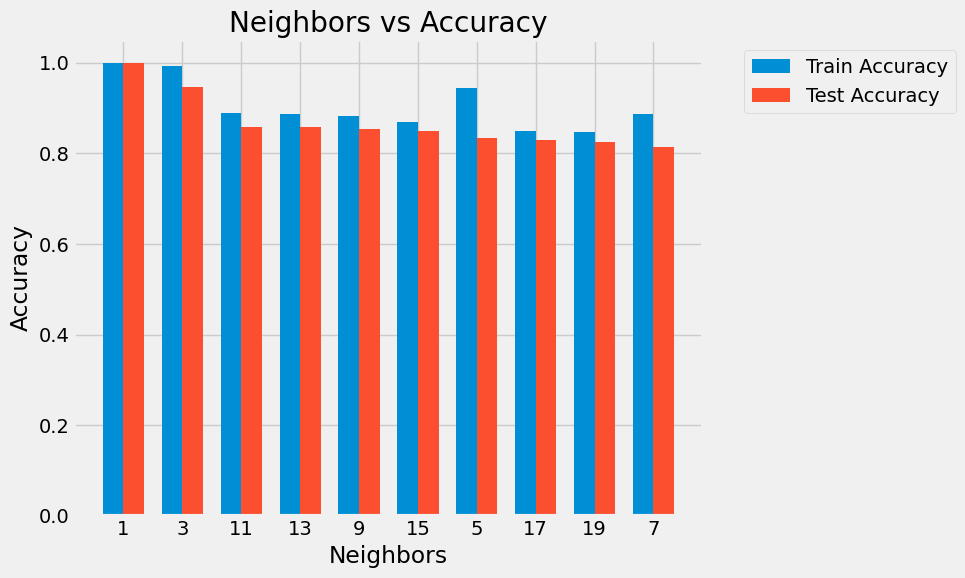

In [124]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

X_axis = np.arange(len(df['n_neighbors']))
width = 0.35

plt.bar(X_axis - width/2, df['train_accuracy'], width, label='Train Accuracy')
plt.bar(X_axis + width/2, df['test_accuracy'], width, label='Test Accuracy')

plt.xticks(X_axis, df['n_neighbors'])  # Set x-axis labels to 'n_neighbors' values
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside the plot
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [125]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Make predictions
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Train Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Train Accuracy: 0.9451219512195121
Test Accuracy: 0.8341463414634146


In [127]:
import joblib
joblib.dump(classifier, 'knn_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [128]:
import joblib
classifier = joblib.load('/content/knn_model.joblib')
scaler = joblib.load('/content/scaler.joblib')

In [129]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [130]:
d = {
    'age': 55,
    'sex': 1,               # 1 = Male, 0 = Female
    'cp': 2,                # Chest pain type (0–3)
    'trestbps': 130,        # Resting blood pressure
    'chol': 250,            # Serum cholesterol in mg/dl
    'fbs': 0,               # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg': 1,           # Resting electrocardiographic results (0–2)
    'thalach': 150,         # Max heart rate achieved
    'exang': 0,             # Exercise-induced angina (1 = yes; 0 = no)
    'oldpeak': 1.2,         # ST depression induced by exercise
    'slope': 2,             # Slope of peak exercise ST segment (0–2)
    'ca': 0,                # Number of major vessels (0–3) colored by fluoroscopy
    'thal': 2               # Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
}

d


{'age': 55,
 'sex': 1,
 'cp': 2,
 'trestbps': 130,
 'chol': 250,
 'fbs': 0,
 'restecg': 1,
 'thalach': 150,
 'exang': 0,
 'oldpeak': 1.2,
 'slope': 2,
 'ca': 0,
 'thal': 2}

In [131]:
sample_data = pd.DataFrame([d])
sample_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,55,1,2,130,250,0,1,150,0,1.2,2,0,2


In [132]:
scaled_data = scaler.transform(sample_data)
scaled_data

array([[0.54166667, 1.        , 0.66666667, 0.33962264, 0.42611684,
        0.        , 0.5       , 0.60305344, 0.        , 0.19354839,
        1.        , 0.        , 0.66666667]])

In [133]:
classifier.predict(scaled_data)[0]

np.int64(0)

In [134]:
classifier.predict_proba(scaled_data)[0]

array([0.6, 0.4])

In [135]:
def predict_survival(d):
    sample_data = pd.DataFrame([d])
    scaled_data = scaler.transform(sample_data)
    pred = classifier.predict(scaled_data)[0]
    prob = np.max(classifier.predict_proba(scaled_data)[0])
    return pred,prob

In [137]:
d = {
    'age': 55,
    'sex': 1,               # 1 = Male, 0 = Female
    'cp': 2,                # Chest pain type (0–3)
    'trestbps': 130,        # Resting blood pressure
    'chol': 250,            # Serum cholesterol in mg/dl
    'fbs': 0,               # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg': 1,           # Resting electrocardiographic results (0–2)
    'thalach': 150,         # Max heart rate achieved
    'exang': 0,             # Exercise-induced angina (1 = yes; 0 = no)
    'oldpeak': 1.2,         # ST depression induced by exercise
    'slope': 2,             # Slope of peak exercise ST segment (0–2)
    'ca': 0,                # Number of major vessels (0–3) colored by fluoroscopy
    'thal': 2               # Thalassemia (1 = normal; 2 = fixed defect; 3 = reversible defect)
}

pred,prob = predict_survival(d)
pred,prob

(np.int64(0), np.float64(0.6))

In [138]:
X.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [139]:
X['fbs'].unique()

array([0, 1])

In [140]:
X['chol'].describe()

,chol
count,1025.00000
mean,246.00000
std,51.59251
min,126.00000
25%,211.00000
50%,240.00000
75%,275.00000
max,564.00000
